In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sb
from sklearn.cluster import KMeans

In [2]:
data=pd.read_csv("C:/Users/raksh/Downloads/Iris (1).csv")

In [3]:
data.info(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
data.head(4)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa


In [5]:
data.shape

(150, 6)

In [6]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

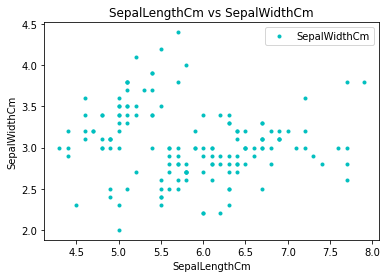

In [8]:
data.plot(x='SepalLengthCm',y='SepalWidthCm',style='.',color='c')
plt.title('SepalLengthCm vs SepalWidthCm')
plt.xlabel('SepalLengthCm')
plt.ylabel('SepalWidthCm')
plt.show()

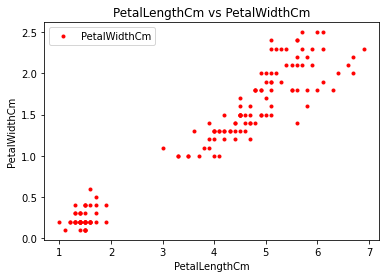

In [9]:
data.plot(x='PetalLengthCm',y='PetalWidthCm',style='.',color='r')
plt.title('PetalLengthCm vs PetalWidthCm')
plt.xlabel('PetalLengthCm')
plt.ylabel('PetalWidthCm')
plt.show()

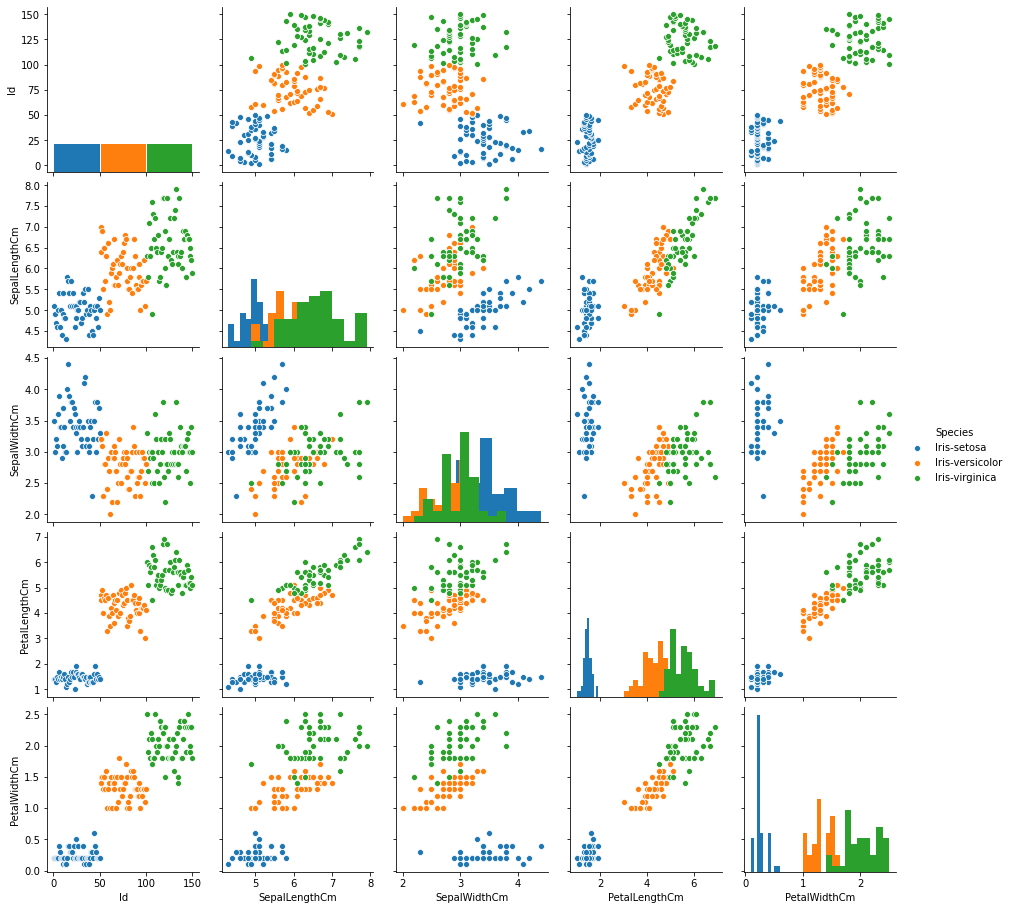

In [10]:
sb.pairplot(data, hue="Species", diag_kind="hist")

In [11]:
data.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


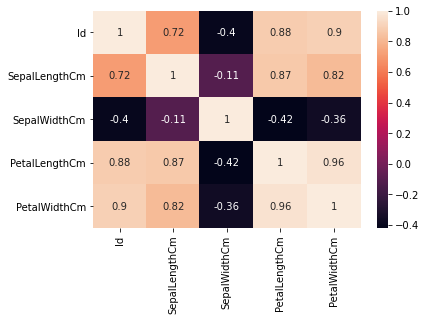

In [12]:
sb.heatmap(data.corr(),annot=True)

In [13]:
df=data.drop(['Id','Species'],axis=1)

In [14]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [15]:
df=data.iloc[:,[0,1,2,3]].values

In [16]:
wcss=[]
for i in range(1,14):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=1)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
wcss

[281831.54466666654,
 70581.3808,
 31320.711199999994,
 17793.6105117263,
 11461.121470238091,
 7897.687416666667,
 5911.592148127233,
 4590.383682883679,
 3584.6357540849667,
 2961.5139981684974,
 2476.1461684981696,
 2086.589131368631,
 1765.506965034965]

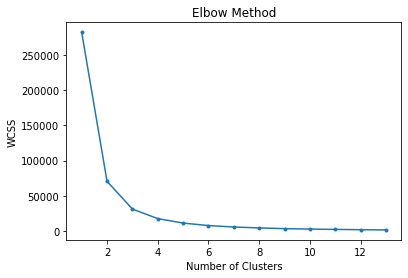

In [17]:
plt.plot(range(1,14),wcss,'.-')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

In [18]:
kmeans=KMeans(n_clusters=3,init='k-means++',random_state=0)
kmeans_y=kmeans.fit_predict(df)
kmeans_y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

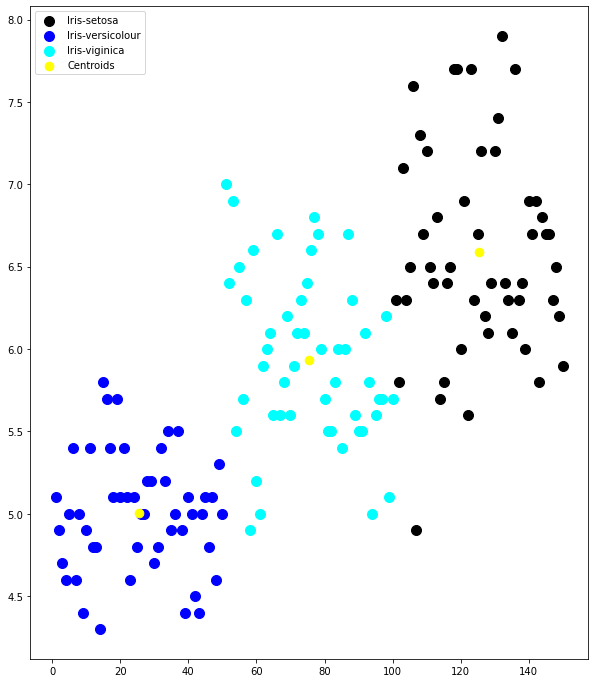

In [19]:
plt.figure(figsize=(10,12))
plt.scatter(df[kmeans_y == 0,0],df[kmeans_y == 0,1],s=100,c='black',label='Iris-setosa')
plt.scatter(df[kmeans_y == 1,0],df[kmeans_y == 1,1],s=100,c='blue',label='Iris-versicolour')
plt.scatter(df[kmeans_y == 2,0],df[kmeans_y == 2,1],s=100,c='cyan',label='Iris-viginica')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'Yellow',marker='.',label = 'Centroids')
plt.legend()
plt.show()